In [124]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import os
import numpy as np
import time
import random
import tensorflow as tf

In [11]:
from matplotlib import pyplot as plt

In [3]:
os.chdir(r"C:\Users\mchen\OneDrive\桌面\ml\code\tutorial\chapter3\20211119\multi_layer")

<h1>Load data from zip file</h1>

In [4]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

In [69]:
###############################################
#    load data from local directory
###############################################

train_x, train_y, val_x, val_y, test_x, test_y = [], [], [], [], [], []

training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

for tra in training_data:
    img_tra_x = tra[0].reshape(28,28).tolist()
    img_tra_y = np.array(np.argmax(tra[1]), dtype=np.uint8)
    train_x.append(img_tra_x)
    train_y.append(img_tra_y)
print(np.shape(train_x))

for val in validation_data:
    img_val_x = val[0].reshape(28,28)
#     img_val_y = np.array(np.argmax(val[1]), dtype=np.uint8)
    img_val_y = np.array(val[1], dtype=np.uint8)
    val_x.append(img_val_x)
    val_y.append(img_val_y)
print(np.shape(val_x))

for tes in test_data:
    img_tes_x = tes[0].reshape(28,28)
    img_tes_y = np.array(tes[1], dtype=np.uint8)
    test_x.append(img_tes_x)
    test_y.append(img_tes_y)
print(np.shape(test_x))


train_x = np.array(train_x)
val_x = np.array(val_x)
test_x = np.array(test_x)

train_y = np.array(train_y)
val_y = np.array(val_y)
test_y = np.array(test_y)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


<h1>Check if the data is in correct format</h1>

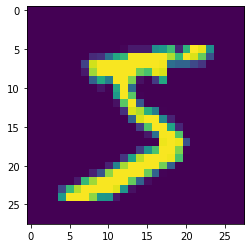

img label: 5


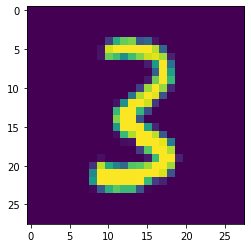

img label: 3


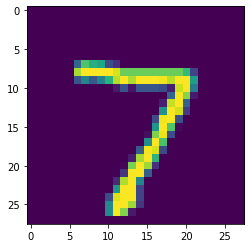

img label: 7


In [76]:
###############################################
#    checking data format:
###############################################
plt.imshow(train_x[0], interpolation='none')
plt.show()
print('img label:', train_y[0])

plt.imshow(val_x[0], interpolation='none')
plt.show()
print('img label:', val_y[0])

plt.imshow(test_x[0], interpolation='none')
plt.show()
print('img label:', test_y[0])


<h1>Run a simple SGD using TF</h1>

In [114]:
################################################################
#   normal SGD method as described in chapter 1&2
################################################################
tf.random.set_seed(42)
################################################################
#    define model

# initializer = tf.keras.initializers.VarianceScaling(
# scale=0.1, mode='fan_in', distribution='uniform')
# layer = tf.keras.layers.Dense(3, kernel_initializer=initializer)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(
    30, 
    activation=tf.nn.sigmoid,
    kernel_initializer=tf.keras.initializers.RandomNormal(stddev=1.0),
    bias_initializer=tf.keras.initializers.RandomNormal(stddev=1.0),
#       kernel_regularizer=tf.keras.regularizers.L1(1.25)
    ),
    tf.keras.layers.Dense(10)
])

n_eph = 60
eta = 0.1

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(
    optimizer=tf.keras.optimizers.SGD(
        learning_rate=eta,
        momentum=0.0,
        nesterov=False,
        name="SGD"),
    loss=loss_fn,
    metrics=['accuracy'])
################################################################


################################################################
# save the model when val_acc is best
checkpoint_filepath = r'C:\Users\mchen\OneDrive\桌面\ml\code\tutorial\chapter3\20211122\simple_sgd_model'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
################################################################




################################################################
#    train model  (how do i randomize mini_batches?)
batch_size = 10

history = model.fit(
    train_x, train_y, 
    epochs=n_eph,
    batch_size=batch_size,
    validation_data=(val_x, val_y),
    callbacks=[model_checkpoint_callback],
    shuffle=True
)

acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
################################################################


################################################################
#    load the weights for the best epoch (best val accuracy)
model.load_weights(checkpoint_filepath)
################################################################

################################################################
#    evaluate test data at the best epoch
[test_data_loss, test_data_accuracy] = model.evaluate(
    test_x, test_y,
    batch_size=len(test_x)
)
################################################################


Epoch 1/60
5000/5000 [==============================] - 5s 906us/step - loss: 0.7521 - accuracy: 0.7627 - val_loss: 0.4544 - val_accuracy: 0.8616
Epoch 2/60
5000/5000 [==============================] - 5s 910us/step - loss: 0.4390 - accuracy: 0.8661 - val_loss: 0.3682 - val_accuracy: 0.8898
Epoch 3/60
5000/5000 [==============================] - 5s 929us/step - loss: 0.3700 - accuracy: 0.8900 - val_loss: 0.3311 - val_accuracy: 0.9005
Epoch 4/60
5000/5000 [==============================] - 5s 955us/step - loss: 0.3305 - accuracy: 0.9004 - val_loss: 0.3071 - val_accuracy: 0.9110
Epoch 5/60
5000/5000 [==============================] - 5s 910us/step - loss: 0.3030 - accuracy: 0.9101 - val_loss: 0.2898 - val_accuracy: 0.9138
Epoch 6/60
5000/5000 [==============================] - 5s 924us/step - loss: 0.2815 - accuracy: 0.9164 - val_loss: 0.2735 - val_accuracy: 0.9217
Epoch 7/60
5000/5000 [==============================] - 5s 908us/step - loss: 0.2639 - accuracy: 0.9218 - val_loss: 0.2598 -

5000/5000 [==============================] - 5s 919us/step - loss: 0.0907 - accuracy: 0.9740 - val_loss: 0.2013 - val_accuracy: 0.9450
Epoch 57/60
5000/5000 [==============================] - 5s 902us/step - loss: 0.0896 - accuracy: 0.9745 - val_loss: 0.2049 - val_accuracy: 0.9440
Epoch 58/60
5000/5000 [==============================] - 5s 1ms/step - loss: 0.0887 - accuracy: 0.9752 - val_loss: 0.1997 - val_accuracy: 0.9452
Epoch 59/60
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0874 - accuracy: 0.9754 - val_loss: 0.2017 - val_accuracy: 0.9439
Epoch 60/60
1/1 [==============================] - 0s 101ms/step - loss: 0.2070 - accuracy: 0.9423


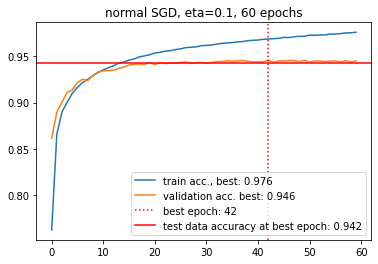

In [116]:
plt.plot(acc, label='train acc., best: {:.3f}'.format(max(acc)))
plt.plot(val_acc, label='validation acc. best: {:.3f}'.format(max(val_acc)))
plt.title('normal SGD, eta={}, {} epochs'.format(eta, n_eph))
plt.axvline(x=np.argmax(val_acc), c='r', ls=':', label='best epoch: {}'.format(np.argmax(val_acc)))
plt.axhline(y=test_data_accuracy, c='r', label='test data accuracy at best epoch: {:.3f}'.format(test_data_accuracy))
plt.legend()
plt.show()

from winsound import Beep
Beep(1000, 100)

<h1>Run a simple SGD using plain Python</h1>

In [133]:

import json
import random
import time
import numpy as np


random.seed(1234)
np.random.seed(42)
###################################################################################################
###################################################################################################
###################################################################################################
class QuadraticCost(object):
    @staticmethod
    def fn(a, y):
        expression = 0.5 * np.linalg.norm(a - y)**2
        return expression

    @staticmethod
    def delta(z, a, y):
        expression = (a-y) * sigmoid_prime(z)
        return expression

###################################################################################################
###################################################################################################
###################################################################################################
class CrossEntropyCost(object):
    @staticmethod
    def fn(a, y):
        expression = -y*np.log(a) - (1 - y)*np.log(1 - a)
        sum_of_ok_number = np.sum(np.nan_to_num(expression))
        return sum_of_ok_number

    @staticmethod
    def delta(z, a, y):
        return(a - y)

###################################################################################################
###################################################################################################
###################################################################################################
class Network(object):

    # modified from chapter2 code, add cross entropy related features
    def __init__(self, sizes, cost=CrossEntropyCost, reg=None):
        self.num_layers = len(sizes)
        self.sizes = sizes
        #self.default_weight_initializer()
        self.large_weight_initializer()
        self.cost = cost
        self.reg = reg
        print('regularization:', reg)

    """new feature in chapter3"""
    def default_weight_initializer(self):
        print('weight initialization: simple randn with scaling in respect to output connections')
        self.biases = [np.random.randn(y, 1) for y in self.sizes[1:]]
        """ initial weights to node n are scaled by number of connection to n """
        self.weights = [np.random.randn(y, x) / np.sqrt(x)
            for x, y in zip(self.sizes[:-1], self.sizes[1:])]

    """ the simple init. weight generator in chapter 1"""
    def large_weight_initializer(self):
        print('weight initialization: simple randn without scaling')
        self.biases = [np.random.randn(y, 1) for y in self.sizes[1:]]
        self.weights = [np.random.randn(y, x)
                       for x, y in zip(self.sizes[:-1], self.sizes[1:])]

    def feedforward(self, a):
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a) + b)
        return a

    ###################################################################################################
    """ new SGD supporting regularization"""
    def SGD(self,
            training_data, epochs, mini_batch_size, eta,
            lmbda=0.0,
            evaluation_data=None,
            monitor_evaluation_cost=False,
            monitor_evaluation_accuracy=False,
            monitor_training_cost=False,
            monitor_training_accuracy=False
            ):

        # n = len(training_data)
        self.mini_batch_size = mini_batch_size
        evaluation_cost, evaluation_accuracy = [], []
        training_cost, training_accuracy = [], []

        for i in range(epochs):
            epoch_start_time = time.time()
            random.shuffle(training_data)
            mini_batches = [training_data[k : k+mini_batch_size]
                for k in range(0, len(training_data), mini_batch_size)]

            """ matrixlization """
            input_data, target_data = [], []
            for mini_batch in mini_batches:
                input_data.append(np.column_stack([mini_batch[j][0] for j in range(mini_batch_size)]))
                target_data.append(np.column_stack([mini_batch[j][1] for j in range(mini_batch_size)]))
            for inputs, targets in zip(input_data, target_data):
                self.update_mini_batch(inputs, targets, eta, lmbda, len(training_data))

            epoch_end_time = time.time()
            epoch_completion_time = epoch_end_time - epoch_start_time
            print('Epoch {0} of {1}: training complete, took {2} seconds'.format(
                i, epochs, round(epoch_completion_time)))

            if monitor_training_cost:
                cost = self.total_cost(training_data, lmbda)
                training_cost.append(cost)
                print('>>>> Cost on training data: {0}'.format(cost))

            if monitor_training_accuracy:
                accuracy = self.accuracy(training_data, convert=True)
                training_accuracy.append(accuracy)
                print('     Accuracy on training data: {0} / {1}'.format(
                    accuracy, len(training_data)))

            if monitor_evaluation_cost:
                cost = self.total_cost(evaluation_data, lmbda, convert=True)
                evaluation_cost.append(cost)
                print('>>>> Cost on evaluation data: {0}'.format(cost))

            if monitor_evaluation_accuracy:
                accuracy = self.accuracy(evaluation_data)
                evaluation_accuracy.append(accuracy)
                print('     Accuracy on evaluation data: {0} / {1}'.format(
                    accuracy, len(evaluation_data)))
            print('#'*60)
        return evaluation_cost, evaluation_accuracy, training_cost, training_accuracy

###################################################################################################
    def L2_reg(self, eta, lmbda, n, w, nw):
        expr = (1 - eta*(lmbda / n))*w - (eta / self.mini_batch_size)*nw
        return expr

    def L1_reg(self, eta, lmbda, n, w, nw):
        expr = w - np.sign(w) * (eta*lmbda / n) - (eta / self.mini_batch_size)*nw
        return expr

    def no_reg(self, eta, lmbda, n, w, nw):
        expr = w - (eta / self.mini_batch_size) * nw
        return expr

    def update_mini_batch(self, inputs, targets, eta, lmbda, n):
        nabla_b, nabla_w = self.backprop(inputs, targets)
        # keep track of the row sum. also we want it as col vec.
        nabla_b = [np.sum(nb, axis=1).reshape((nb.shape[0],1)) for nb in nabla_b]

        if self.reg == None:
            self.weights = [self.no_reg(eta, lmbda, n, w, nw)
                                for w, nw in zip(self.weights, nabla_w)]
        if self.reg == "L1":
            self.weights = [self.L1_reg(eta, lmbda, n, w, nw)
                                for w, nw in zip(self.weights, nabla_w)]
        if self.reg == "L2":
            self.weights = [self.L2_reg(eta, lmbda, n, w, nw)
                                for w, nw in zip(self.weights, nabla_w)]

        self.biases = [b - (eta / self.mini_batch_size)*nb
                            for b, nb in zip(self.biases, nabla_b)]
###################################################################################################

    def backprop(self, inputs, targets):
        # expand b in row direction (add as new cols)
        nabla_b = [np.tile(np.zeros(b.shape), (1, self.mini_batch_size)) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        activation = inputs
        activations = [inputs]
        zs = []
        for b, w in zip(self.biases, self.weights):
            bias = np.tile(b, (1, self.mini_batch_size))
            z = np.dot(w, activation) + bias
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        delta = (self.cost).delta(zs[-1], activations[-1], targets)
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l + 1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l - 1].transpose())
        return (nabla_b, nabla_w)

    """ new feature in chapter 3 """
    def accuracy(self, data, convert=False):
        if convert:
            result = [(np.argmax(self.feedforward(x)), np.argmax(y)) for x, y in data]
        else:
            result = [(np.argmax(self.feedforward(x)), y) for x, y in data]
        accuracy = sum(int(x == y) for (x, y) in result)
        return accuracy

    """ new feature in chapter 3 """
    def total_cost(self, data, lmbda, convert=False):
        cost = 0.0
        for x, y in data:
            a = self.feedforward(x)
            if convert:
                y = vectorized_result(y)
            cost = cost + self.cost.fn(a, y) / len(data)
        expression = 0.5 * (lmbda / len(data)) * sum(np.linalg.norm(w)**2 for w in self.weights)
        cost = cost + expression
        return cost

    """ new feature in chapter 3 """
    def save(self, filename):
        data = {
                "sizes": self.sizes,
                "weights": self.weights,
                "biases": self.biases,
                "cost": str(self.cost.__name__)
                }
        with open(filename, 'w') as f:
            json.dump(data, f)

###################################################################################################
###################################################################################################
###################################################################################################

""" new feature in chapter 3 """
def load(filename):
    with open(filename, 'r') as f:
        data = json.load(f)
    # get the cost function class used in data
    cost = getattr(sys.modules[__name__], data["cost"])
    net = Network(data["sizes"], cost=cost)
    net.weights = [np.array(w) for w in data["weights"]]
    net.biases = [np.array(b) for b in data["biases"]]
    return net

###################################################################################################
def vectorized_result(n):
    e = np.zeros((10, 1))
    e[n] = 1.0
    return e

###################################################################################################
""" Miscellaneous functions """
def sigmoid(x):
    input_range = 34.53877639491068407551
    x = np.clip(x, -input_range, input_range)
    return 1.0 / (1.0 + np.exp(-x))
###################################################################################################
def sigmoid_prime(z):
    """ Derivative of the sigmoid function """
    return sigmoid(z) * (1-sigmoid(z))

#############################################################################################################################
#############################################################################################################################
#############################################################################################################################


""" run network, chapter3 version"""
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

s = time.time()
net = Network([784, 30, 10], cost=CrossEntropyCost, reg=None)
n_eph = 60
batch_size = 10
eta = 0.1
ret = net.SGD(
    training_data,
    n_eph,
    batch_size,
    eta,
    lmbda = 5.0, # reg param.
    evaluation_data=validation_data,
    monitor_evaluation_accuracy=True,
    monitor_evaluation_cost=True,
    monitor_training_accuracy=True,
    monitor_training_cost=True
    )

evaluation_cost, evaluation_accuracy, training_cost, training_accuracy = ret
e = time.time()
print(e-s, 's')


weight initialization: simple randn without scaling
regularization: None
Epoch 0 of 60: training complete, took 2 seconds
>>>> Cost on training data: 2.1243075354074303
     Accuracy on training data: 42718 / 50000
>>>> Cost on evaluation data: 6.862022897464885
     Accuracy on evaluation data: 8669 / 10000
############################################################
Epoch 1 of 60: training complete, took 2 seconds
>>>> Cost on training data: 1.9078582140120233
     Accuracy on training data: 44519 / 50000
>>>> Cost on evaluation data: 6.682316659777735
     Accuracy on evaluation data: 8994 / 10000
############################################################
Epoch 2 of 60: training complete, took 2 seconds
>>>> Cost on training data: 1.817632151048654
     Accuracy on training data: 45244 / 50000
>>>> Cost on evaluation data: 6.616508761850007
     Accuracy on evaluation data: 9113 / 10000
############################################################
Epoch 3 of 60: training complete, 

     Accuracy on training data: 48218 / 50000
>>>> Cost on evaluation data: 6.642829177377288
     Accuracy on evaluation data: 9506 / 10000
############################################################
Epoch 28 of 60: training complete, took 2 seconds
>>>> Cost on training data: 1.5252064568011157
     Accuracy on training data: 48216 / 50000
>>>> Cost on evaluation data: 6.651220498978241
     Accuracy on evaluation data: 9506 / 10000
############################################################
Epoch 29 of 60: training complete, took 2 seconds
>>>> Cost on training data: 1.521887714160624
     Accuracy on training data: 48280 / 50000
>>>> Cost on evaluation data: 6.662080452020627
     Accuracy on evaluation data: 9502 / 10000
############################################################
Epoch 30 of 60: training complete, took 2 seconds
>>>> Cost on training data: 1.5219959117256385
     Accuracy on training data: 48299 / 50000
>>>> Cost on evaluation data: 6.674778803411313
     Accur

Epoch 55 of 60: training complete, took 2 seconds
>>>> Cost on training data: 1.5262392919578736
     Accuracy on training data: 48698 / 50000
>>>> Cost on evaluation data: 6.957360008109616
     Accuracy on evaluation data: 9526 / 10000
############################################################
Epoch 56 of 60: training complete, took 2 seconds
>>>> Cost on training data: 1.5272028190526563
     Accuracy on training data: 48714 / 50000
>>>> Cost on evaluation data: 6.965048625145095
     Accuracy on evaluation data: 9518 / 10000
############################################################
Epoch 57 of 60: training complete, took 2 seconds
>>>> Cost on training data: 1.5285741479787036
     Accuracy on training data: 48733 / 50000
>>>> Cost on evaluation data: 6.980002028495493
     Accuracy on evaluation data: 9519 / 10000
############################################################
Epoch 58 of 60: training complete, took 2 seconds
>>>> Cost on training data: 1.5319708246867447
     A

In [134]:
from winsound import Beep
Beep(1000, 100)

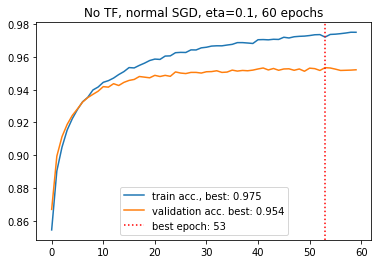

In [135]:
e_accuracy = np.array(evaluation_accuracy)/10000
t_accuracy = np.array(training_accuracy)/50000


plt.plot(t_accuracy, label='train acc., best: {:.3f}'.format(max(t_accuracy)))
plt.plot(e_accuracy, label='validation acc. best: {:.3f}'.format(max(e_accuracy)))
plt.title('No TF, normal SGD, eta={}, {} epochs'.format(eta, n_eph))
plt.axvline(x=np.argmax(evaluation_accuracy), c='r', ls=':', label='best epoch: {}'.format(np.argmax(evaluation_accuracy)))
# plt.axhline(y=test_data_accuracy, c='r', label='test data accuracy at best epoch: {:.3f}'.format(test_data_accuracy))
plt.legend()
plt.show()

<h1>Both the TF version and the plain python version shows an increasing training accuracy while validation accuracy stops rising pretty early. Based on this I think the 2 models are in good agreement.</h1>

